In [1]:
import pandas as pd
from datetime import datetime
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
fr = pd.read_csv("fr.csv")
th = pd.read_csv("th.csv")

In [3]:
fr.head()

,Unnamed: 0,dst2src_min_ps,dst2src_stddev_ps,bidirectional_max_piat_ms,bidirectional_min_piat_ms,src2dst_max_ps,dst2src_packets,bidirectional_bytes,bidirectional_duration_ms,labels
0,0,56,3.077935,50763,0,68,20,2360,93070,0
1,1,48,0.000000,0,0,32,2,160,0,0
2,2,163,0.000000,0,0,207,2,740,0,0
3,3,0,295.665595,25178,0,936,18,6350,26392,0
4,4,0,95.822380,1,0,233,8,880,1,0


In [4]:
th.head()

,Unnamed: 0,dst2src_min_ps,dst2src_stddev_ps,bidirectional_max_piat_ms,bidirectional_min_piat_ms,src2dst_max_ps,dst2src_packets,bidirectional_bytes,bidirectional_duration_ms,labels
0,0,0,0.0,0,0,16,0,160,0,0
1,1,0,0.0,15247,0,28,0,532,15251,0
2,2,0,0.0,4008,0,8,0,216,8012,0
3,3,109,0.0,24,24,34,1,143,24,0
4,4,95,0.0,27,0,34,2,258,27,0


In [5]:
full = pd.concat([fr,th])
full.head()

,Unnamed: 0,dst2src_min_ps,dst2src_stddev_ps,bidirectional_max_piat_ms,bidirectional_min_piat_ms,src2dst_max_ps,dst2src_packets,bidirectional_bytes,bidirectional_duration_ms,labels
0,0,56,3.077935,50763,0,68,20,2360,93070,0
1,1,48,0.000000,0,0,32,2,160,0,0
2,2,163,0.000000,0,0,207,2,740,0,0
3,3,0,295.665595,25178,0,936,18,6350,26392,0
4,4,0,95.822380,1,0,233,8,880,1,0


In [6]:
full = full.drop("Unnamed: 0", axis=1)

In [7]:
full["labels"].value_counts()

0    629068
1    215162
Name: labels, dtype: int64

<AxesSubplot:>

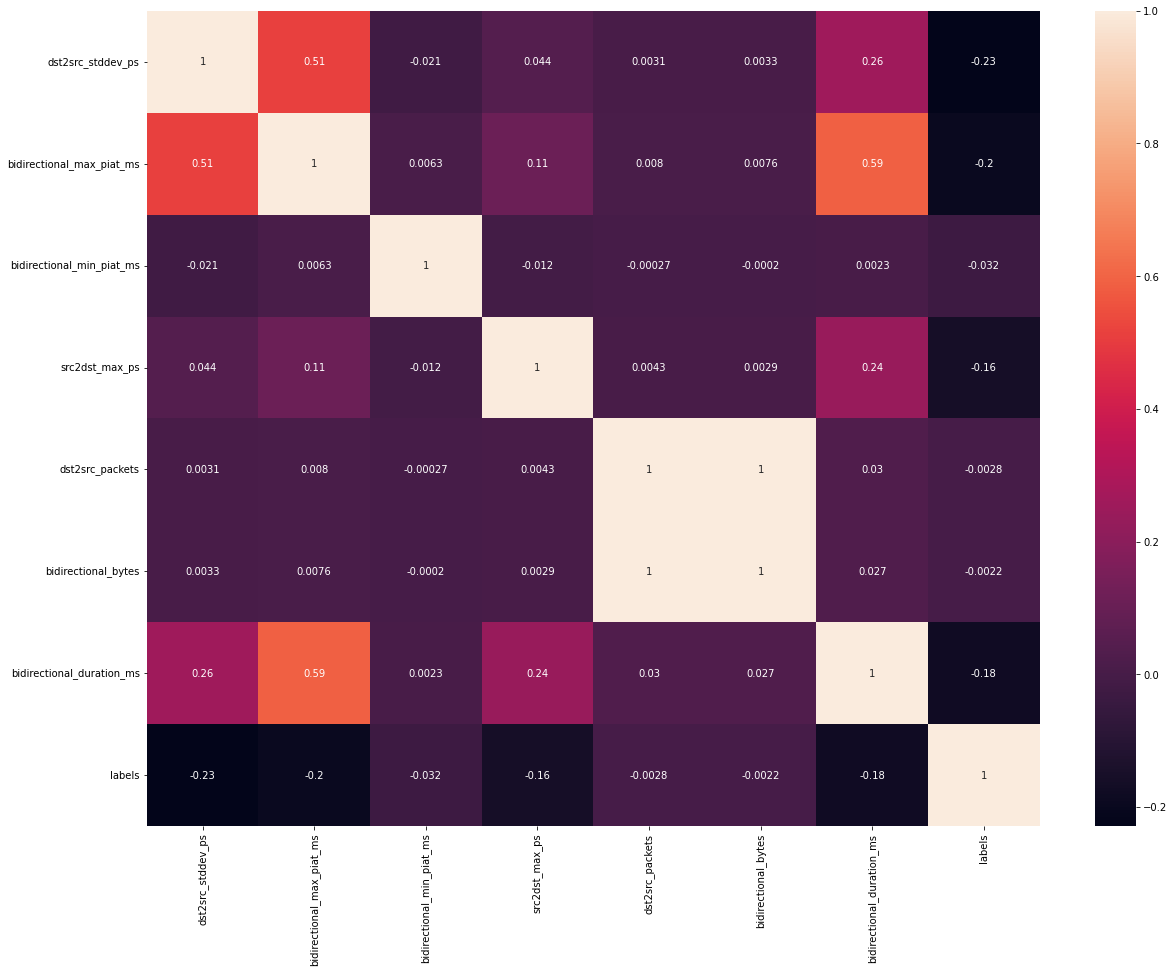

In [8]:
for_cor = full
corr = full.corr(method="pearson")
plt.subplots(figsize=(20,15))
sns.heatmap(corr.iloc[1:20:, 1:20:], annot=True)

In [9]:
full = full.drop("bidirectional_bytes", axis=1)

# Что используем

In [10]:
full.columns

Index(['dst2src_min_ps', 'dst2src_stddev_ps', 'bidirectional_max_piat_ms',
       'bidirectional_min_piat_ms', 'src2dst_max_ps', 'dst2src_packets',
       'bidirectional_duration_ms', 'labels'],
      dtype='object')

# Подготовка

In [11]:
labels = full["labels"]
labels

0         0
1         0
2         0
3         0
4         0
         ..
343129    0
343130    0
343131    0
343132    0
343133    0
Name: labels, Length: 844230, dtype: int64

In [12]:
full = full.drop("labels", axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(full, labels, test_size=0.2, random_state=666, shuffle=True)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [17]:
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 200, num = 15)]
max_features = ['log2', 'sqrt']
criterions = ["entropy", "gini"]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 300, num = 20)]
min_samples_leaf = [int(x) for x in np.linspace(start = 10, stop = 100, num = 15)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterions
             }
rs = RandomizedSearchCV(RandomForestClassifier(), 
                        param_dist, 
                        n_iter = 20, 
                        cv = 2, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=666,
                        scoring='recall'
                        )
rs.fit(X_train, y_train)
rs.best_params_

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.8min finished


{'n_estimators': 67,
 'min_samples_split': 111,
 'min_samples_leaf': 29,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': False}

In [18]:
y_pred_rs = rs.best_estimator_.predict(X_test)
confusion_matrix(y_test, y_pred_rs)

array([[123427,   2271],
       [   103,  43045]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred_rs, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    125698
           1       0.95      1.00      0.97     43148

    accuracy                           0.99    168846
   macro avg       0.97      0.99      0.98    168846
weighted avg       0.99      0.99      0.99    168846



In [20]:
import joblib
joblib.dump(rs.best_estimator_, "model.pkl") 

['model.pkl']